In [87]:
import numpy as np
import pandas as pd

from scipy import stats

import matplotlib.pyplot as plt

from geopy.geocoders import Nominatim
from folium import Map
from folium.plugins import HeatMap


data_path = r'C:\Users\emmam\Documents\nlb\data\AB_NYC_2019.csv'


In [11]:
df = pd.read_csv(data_path)
display(
df.sample(5),
df.info(),
)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
19237,15314886,Artsy Duplex in Chelsea w/ Huge Terrace,7139819,Nauman,Manhattan,Chelsea,40.74738,-74.00134,Entire home/apt,179,3,3,2017-05-20,0.09,2,0
34893,27662837,Single room w/ attached bath in heart of Flushing,205745676,Liqin,Queens,Flushing,40.75732,-73.82075,Private room,75,1,25,2019-06-29,2.31,9,360
7153,5207973,Bright 2BD in East Village,26942242,Alfred,Manhattan,East Village,40.72950,-73.98623,Entire home/apt,230,2,1,2015-03-31,0.02,1,0
39445,30739837,Spacious and relaxing apartment in UWS.,181370114,Feizal,Manhattan,Upper West Side,40.79167,-73.97864,Entire home/apt,500,1,0,NaN,NaN,1,87
30578,23665341,"Sunny 1BR in Sunnyside, Queens",176793977,Patrizia,Queens,Sunnyside,40.74035,-73.91663,Private room,60,7,0,NaN,NaN,1,0


None

In [47]:
r_typs = df['room_type'].unique()
r_typs

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [55]:
geolocator = Nominatim(user_agent='app')

def geo_locate(df, typ):
    lat = df['latitude']
    long = df['longitude']
    typ = df[f'{typ}']
    return(lat,long, typ)

In [67]:
#1 Plot to demonstrate the distribution of the room types on US Map.



    
lat_lon_typ = df.apply(geo_locate, args=('room_type',), axis=1)

# my_series.apply(your_function, args=(2,3,4), extra_kw=1)


for r_t in r_typs:
    print(r_t)
    mapname= f"map_{r_t}".replace(" ", "_").replace(r"/", "")
    slice_lat_lon_typ = [i for i in lat_lon_typ if i[2] == r_t]
    slice_lat_lon_typ = [i[:2] for i in slice_lat_lon_typ]
    #print(mapname)
    exec(f"{mapname} = Map(location= [40.72, -73.9], detault_zoom_start = 12, control_scale=True)")
    exec(f"HeatMap(slice_lat_lon_typ, zoom=20, radius=15,).add_to({mapname})")
    exec(f"display ({mapname})")





Private room


Entire home/apt


Shared room


In [68]:
#2 Distribution of rental properties in each neighborhood group on US Map


    
lat_lon_typ = df.apply(geo_locate, args=('neighbourhood_group',), axis=1)

# my_series.apply(your_function, args=(2,3,4), extra_kw=1)


for r_t in df['neighbourhood_group'].unique():
    print(r_t)
    mapname= f"map_{r_t}".replace(" ", "_").replace(r"/", "")
    
    slice_lat_lon_typ = [i for i in lat_lon_typ if i[2] == r_t]
    
    slice_lat_lon_typ = [i[:2] for i in slice_lat_lon_typ]
    
    #print(mapname)
    exec(f"{mapname} = Map(location= [40.72, -73.9], detault_zoom_start = 12, control_scale=True)")
    exec(f"HeatMap(slice_lat_lon_typ, zoom=20, radius=15,).add_to({mapname})")
    exec(f"display ({mapname})")




Brooklyn


Manhattan


Queens


Staten Island


Bronx


<AxesSubplot:>

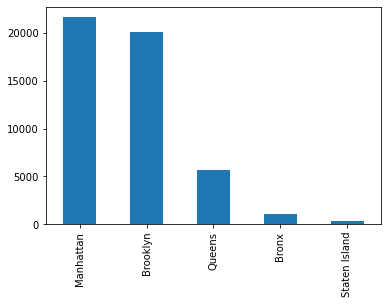

In [72]:
#3 Visualize the number of homes in each neighborhood groups

df['neighbourhood_group'].value_counts().plot.bar()

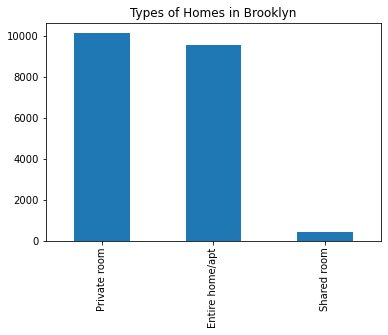

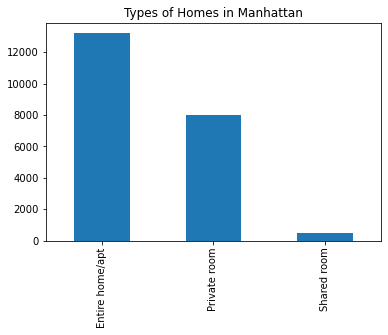

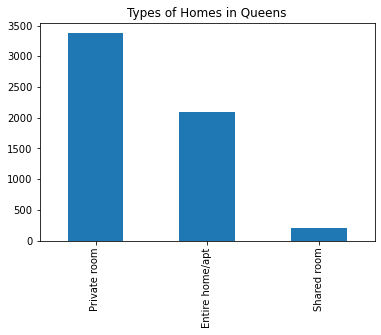

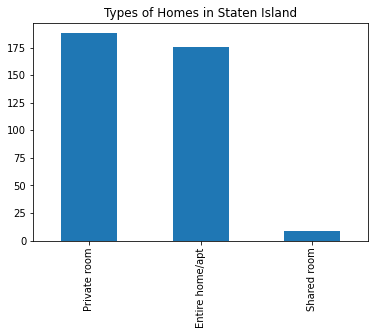

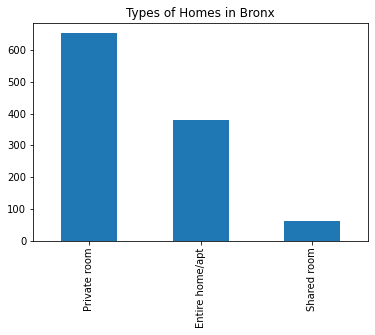

In [75]:
#4 Visualize the number of different types of homes in different neighborhood groups

for n_g in df['neighbourhood_group'].unique():
    df.loc[ df['neighbourhood_group'] == n_g]['room_type'].value_counts().plot.bar(title=f'Types of Homes in {n_g}')
    plt.show()


In [119]:
#5 Which neighborhood group is most and least expensive?

# for n_g in df['neighbourhood_group'].unique():
#     display(
#     f"Describe prices of {n_g}",
#     df.loc[ df['neighbourhood_group'] == n_g]['price'].describe(),
#     f"Median price of {n_g}",
#     df.loc[ df['neighbourhood_group'] == n_g]['price'].median()
#     )
    
median_prices_dict = {n_g : df.loc[ df['neighbourhood_group'] == n_g]['price'].median() for n_g in df['neighbourhood_group'].unique()}


median_prices_list = sorted(median_prices_lst.items(), key=lambda ii:ii[1])
display(
    #median_prices_list,
    f"most  expensive neighbourhood_group is {median_prices_list[-1][0]} with median price {median_prices_list[-1][1]}",
    f"least expensive neighbourhood_group is {median_prices_list[0][0]} with median price {median_prices_list[0][1]}",
    )

'most  expensive neighbourhood_group is Manhattan with median price 150.0'

'least expensive neighbourhood_group is Bronx with median price 65.0'

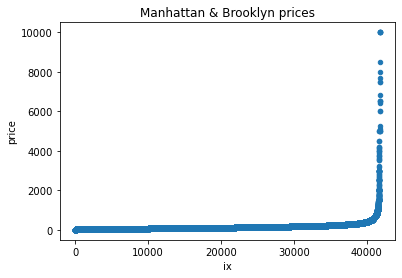

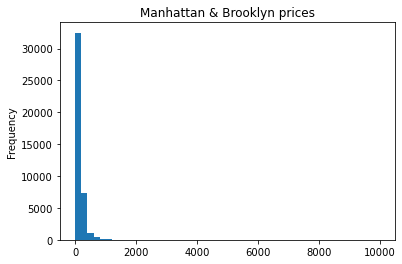

'Prices for Brooklyn + Manhattan are NOT normally distributed.'

In [120]:
#6 Are Brooklyn and Manhattan rental samples show normal distribution. Prove it using hypothesis testing?


df1 = df.loc[df['neighbourhood_group'].isin(['Brooklyn', 'Manhattan'])].sort_values('price').reset_index()#
df1['ix']=df1.index
df1.plot.scatter(y='price',x='ix', title= 'Manhattan & Brooklyn prices ascending')
plt.show()



df1['price'].plot.hist(title='Manhattan & Brooklyn prices histogram', bins=50)
plt.show()

display("Prices for Brooklyn + Manhattan are NOT normally distributed.")



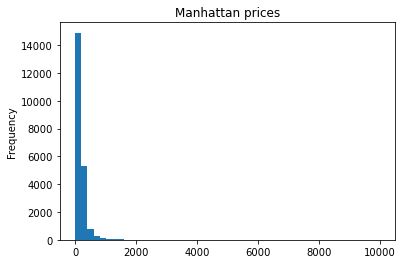

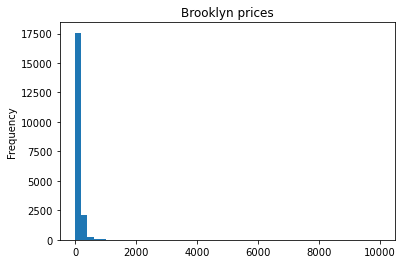

'Prices are not normally distributed for either'

In [121]:
df1 = df.loc[df['neighbourhood_group'].isin(['Manhattan'])].sort_values('price').reset_index()#
df1['ix']=df1.index
df1['price'].plot.hist(title='Manhattan prices', bins=50)
plt.show()


df1 = df.loc[df['neighbourhood_group'].isin(['Brooklyn'])].sort_values('price').reset_index()#
df1['ix']=df1.index
df1['price'].plot.hist(title='Brooklyn prices', bins=50)
plt.show()

display('Prices are not normally distributed for either')



In [133]:

#7 Compare all features with rental price and write the top two important features.

# dir(df.corr())
c=df.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")
so[so<1][-2:]
#8 Do any of the features show multicollinearity?


#9 Use hypothesis testing to show if there any relationship between room type and neighborhood group values.

 

host_id  id         0.58829
id       host_id    0.58829
dtype: float64